#Experimento de la aguja de Buffon

Es un experimento para aparoximar $\pi$. \
Se trata de lanzar una aguja sobre una superficie horizontal en las que están trazadas unas lineas paralelas equidistantes (separadas a la misma distancia d).\
Sea $x$ la distancia entre el centro de la aguja a la línea más cercana
$$x\in [0,\frac{d}{2}]$$
Sea $\theta$ el ángulo entre las líneas
$$\theta \in [0, \frac{\pi}{2}]$$
Así la condición a cumplir es
$$x\leq \frac{1}{2}sen(\theta)$$
$$Probabilidad(aguja\ cruce\ o\ toque)=\frac{Áreabajo la curva}{Área de la red}$$
\
$$=\frac{\int_0^{\frac{\pi}{2}}\frac{L}{2}sen\theta}{\frac{\pi}{2}\frac{d}{2}}$$
\
$$=\frac{2d}{\pi L}$$
Para este experimento
$$L=d$$
es decir, la longitud de las agujas es la misma que la distancia que hay entre las líneas
$$\frac{n}{N}\approx \frac{2}{\pi}$$
$$\pi\approx \pi^2 \frac{n}{2N}$$

## Analíticamente
Tenemos un estimador
$$\bar \pi =\pi^2 \frac{n}{2N}$$
Consideramos la variable
$$X_i\begin{cases}
1 \ &\text{si la aguja toca una linea } \ (p) \\
0 \ &\text{otro caso } \ (1-p) \\
\end{cases}$$

Por la ley de los grandes números, consideramos
$$z=\pi^2 \frac{X_1+X_2+...+X_N}{2N}$$
Y calculamos el valor esperado y la esperanza
1. $E[X_i]=1p+0(1-p)=p$
$$E[z]=\frac{\pi^2}{2N}(E[X_1]+...+E[X_N])$$
$$E[z]=\frac{\pi^2}{2N}*Np=\frac{\pi^2}{2}*p$$
$$E[z]=\frac{\pi^2}{2} p$$
\
2. $V[X_i]=E[X_i^2]-E[X_i]^2=(1^2p+0^2(1-p))-p^2=p-p^2=p(1-p)$
$$V[z]=\frac{\pi^2}{4N^2}(V[X_1]+...+V[X_N])$$
$$V[z]=\frac{\pi^2}{4N^2}*Np(1-p)$$
$$V[z]=\frac{\pi^2p(1-p)}{4N}$$

Ahora podemos usar la desigualdad Chebyshev
$$P(|z_N-\pi|\geq ϵ)\leq \frac{V[z_N]}{ϵ^2}$$
$$P(|z_N-\pi|\geq ϵ)\leq \frac{\pi^2 p(1-p)}{2Nϵ^2}$$
Luego, dado un valor de $ϵ$ podemos calcular el valor de N

##Ejemplo
¿Cuántas agujas hay que lanzar para que la probilidad de cometer un error mayor o igual a 0.1 sea menor que 0.01?
###1. Supongamos que sabemos $p=\frac{2}{\pi}$
$ϵ=0.1$ \
$P(|z_N-\pi|\geq ϵ)=0.01$
$$N=\frac{\pi^2 p(1-p)}{2P(|z_N-\pi|\geq ϵ)*ϵ^2}$$
\
$$N=\frac{\pi^2 \frac{2}{π}(1-\frac{2}{\pi})}{2(0.01*(0.1)^2)}\approx 11416 $$
###2. Si no conocemos p
Sí sabemos $0<p<1$. Veamos cómo es $p(1-p)$

Calcular puntos extremos utilizando el criterio de la primera derivada \
Si
$$f(x)=x(1-x)$$
$f^{´}=1-2x$ \
Encontramos los puntos críticos \
$f^{´}=0$
$$1-2x=0$$
$$x=\frac{1}{2}$$

Para $f^{´}>0$
$$1-2x>0$$
$$x<\frac{1}{2}$$
Para $f^{´}<0$
$$x>\frac{1}{2}$$
Combinamos los intervalos
$$-∞<x<\frac{1}{2},\ x=\frac{1}{2}, \frac{1}{2}<x<∞$$
Resumen del comportamiento de los intervalos \
Creciente $-∞<x<\frac{1}{2}$ \
Decreciente $\frac{1}{2}<x<∞$ \
Sustituimos en $x(1-p)$
$$\frac{1}{2}(1-\frac{1}{2})=\frac{1}{4}$$
$$Máximo (\frac{1}{2},\frac{1}{4})$$

In [1]:
#Importamos las librerías a ocupar
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
from math import sin

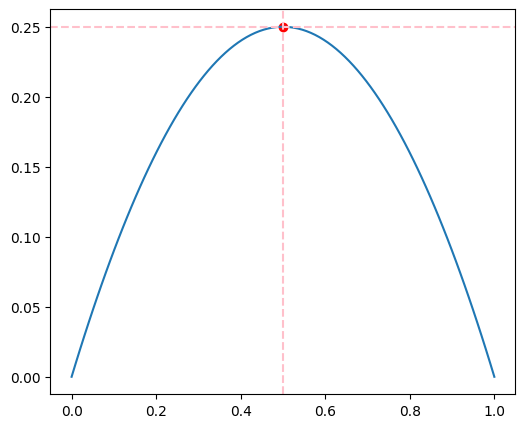

In [51]:
x=np.linspace(0,1,100) #rango en x de [0,1]
y=x*(1-x) #función f(x)
x_c=0.5 #punto crítico

y_c=0.25 #valor de la función en el punto crítico
plt.figure(figsize=(6,5)) #Crear figura
plt.plot(x,y) #Graficar
plt.axvline(x_c,color="pink", linestyle="--")
plt.axhline(y_c,color="pink", linestyle="--")
plt.scatter(x_c,y_c,color="red") #Graficar punto crítico
plt.show()

Esto significa que
$$p(1-p)\leq \frac{1}{4}$$
Volvemos a calcular
$$N\leq \frac{\pi^2(\frac{1}{4})}{2(0.01(0.1^2))}$$
$$N\leq 12337$$
\
La primera $N$ que se obtuvo es una igualdad y la segunda una desigualdad, por eso está tan distanciadas ambas cantidades.

## Simulación
Tenemos la función
$$x=\frac{1}{2}sen(\theta)$$

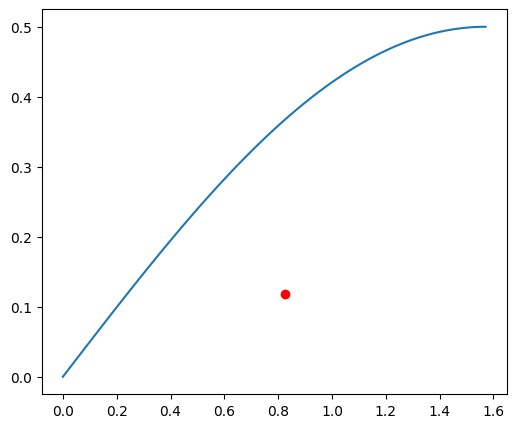

In [54]:
x=np.linspace(0,np.pi/2,100) #rango en x de [0,pi/2]
y=1/2*np.sin(x) #función
theta=1/2*np.pi*rnd.uniform(0,1) #Genera un valor aleatorio entre 0 y pi/2
u=rnd.uniform(0,1/2) #Genera un valor aleatorio entre 0 y 1/2

plt.figure(figsize=(6,5)) #Crear figura
plt.plot(x,y) #Graficar
plt.scatter(theta,u,color="red") #Grafica un punto, ya sea fuera o dentro de lafunción
plt.show()

In [55]:
def estimación (n): #Regresa una lista de probabilidades de pi
 cruces=0 #contador para el número de cruces
 lista1=[]
 x_1=[] #Valores para x,y en caso de cruce
 y_1=[]
 x_2=[] #Valores para x,y en caso contrario
 y_2=[]
 for i in range(n):
  x=rnd.uniform(0,1/2) #Genera un valor aleatorio entre 0 y 1/2
  theta=1/2*np.pi*rnd.uniform(0,1) #Genera un valor aleatorio entre 0 y pi/2
  if x<=1/2*sin(theta): #condición de cruce
   cruces+=1 #éxito
   x_1.append(theta)
   y_1.append(x)
  else:
    x_2.append(theta)
    y_2.append(x)
  prob=cruces/((i+1)*2) #probabilidad de 2/pi
  lista1.append(prob*(np.pi)**2)
 return lista1,x_1,y_1,x_2,y_2 #también regresa los cruces y casos contrarios

In [56]:
S,x_1,y_1,x_2,y_2=estimación (2000) #Define la lista de prob como S

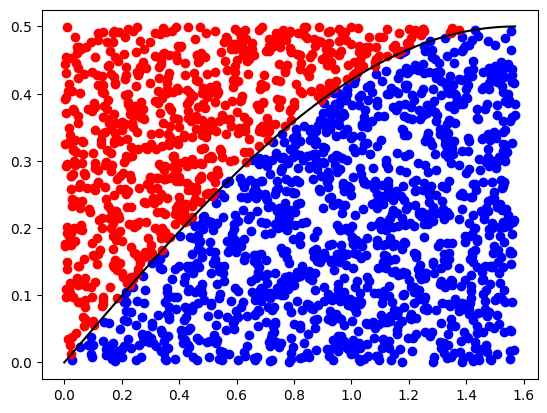

In [58]:
x=np.linspace(0,np.pi/2,2000) #Rango del eje de las x
plt.plot(x,1/2*np.sin(x), color="black")
plt.scatter(x_1,y_1,color="blue") #Éxitos
plt.scatter(x_2,y_2,color="r")
plt.show()

In [59]:
media=np.mean(S) #Calcula la media
print(media)

3.1512796059458825


In [60]:
desve=np.std(S) #Calcula la desviación estándar
print(desve)

0.10572986839835431


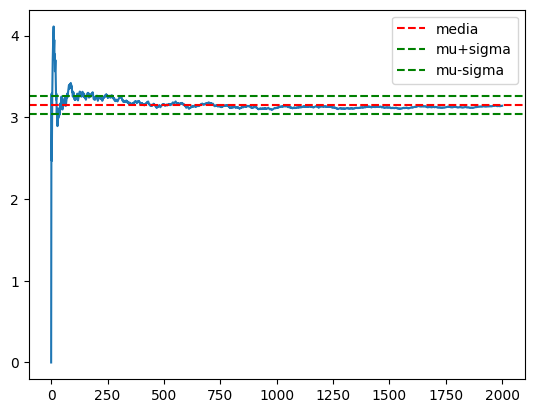

In [61]:
plt.plot(S)
plt.axhline(media, color='r', linestyle='--', label='media') #Grafica una linea vertical en la media
plt.axhline(media + desve, color='g', linestyle='--', label="mu+sigma") #media+desviación estándar
plt.axhline(media - desve, color='g', linestyle='--', label="mu-sigma") #media-desviación estándar

plt.legend() #Mostrar leyenda
plt.show()

A vista, se ve que una muestra de tamaño $N\approx 500$ da un resultado aceptable
\
Para modificar la función y convertirla en una *corrida* de la simulación fijamos $N= 500$ y de la lista, tomamos el último dato, así M veces

In [72]:
def simulación (M): #Esta función retorna la simulación de la estimación de pi
 r=[]
 for i in range(M):
  F,a,b,c,d=estimación(500) #fijamos N=750
  r.append(F[-1])
 return r

In [73]:
D=simulación (2000) #Realizamos la simulación M veces

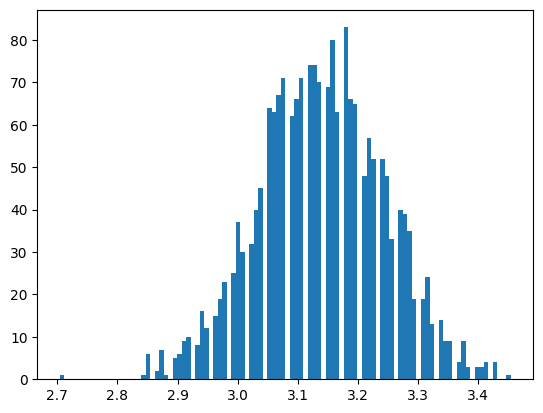

In [74]:
plt.hist(D,bins=100)
plt.show()

In [70]:
P=abs(media-np.pi) #Calculamos |z_N-pi| y al resultado le llamamos P
print(P)

0.009686952356089407


###¿Qué valor de N?
$ϵ$ es el error y la desviación estándar. Entonces, de la desigualdad Chebyshev
$$P(|z_N-\pi|\geq ϵ)\leq \frac{V[z_N]}{ϵ^2}$$
$$N=\frac{\pi^2 \frac{2}{π}(1-\frac{2}{\pi})}{2(0.01*(0.1)^2)}$$

In [75]:
N_0=((np.pi)**2)*(desve**2)/(2*P*(desve**2))
print("N = ", round(N_0))

N =  509
